In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(rf"C:\Users\SEENU\Desktop\Ducat Studies\Datasets\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Spending'})

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.drop(columns={'CustomerID','Gender'}, axis=1,inplace=True)

In [7]:
df.isnull().sum()

Age         0
Income      0
Spending    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
df = scale.fit_transform(df)

In [10]:
df

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss = []

for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [13]:
wcss

[600.0,
 476.378576665286,
 297.0265446338419,
 205.22514747675916,
 168.24758017556837,
 133.95783838454764,
 146.90547213470296,
 109.00352658841888,
 96.51205624442991,
 92.06553157222399,
 76.19568728531837,
 68.00160352608931,
 63.7076448107023,
 65.00769478260591,
 58.26014841276363,
 57.282472814262064,
 51.896748552654,
 51.945875483466,
 47.994908208875444,
 46.52357155196561]

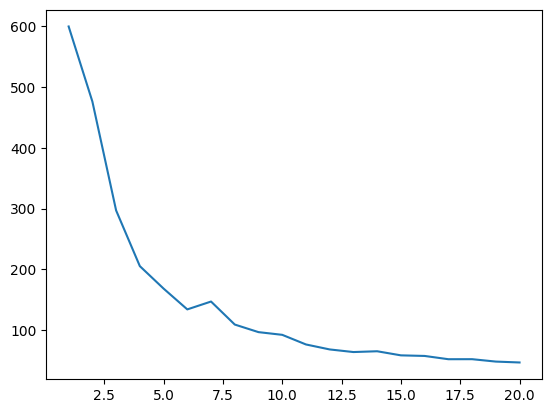

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(1,21),wcss)

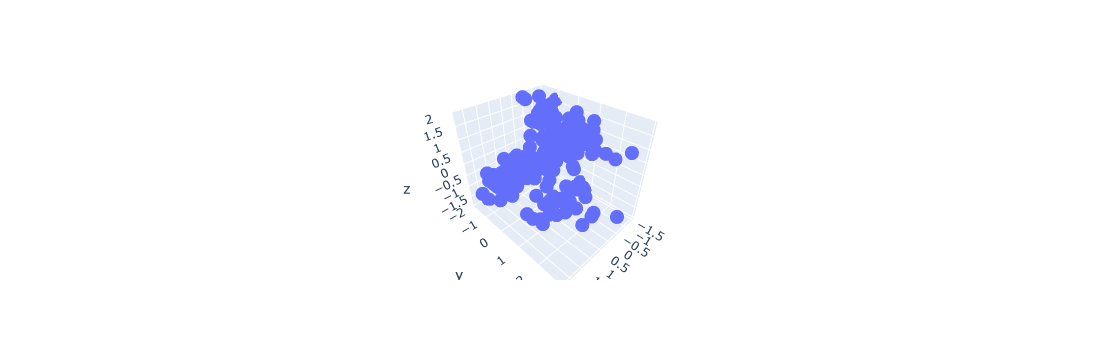

In [17]:
import plotly.express as px

fig = px.scatter_3d(x = df[:,0], y = df[:,1], z = df[:,2])
fig.show()

In [21]:
km = KMeans(n_clusters=4,init='k-means++',random_state=42)
y = km.fit_predict(df)

In [22]:
y

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

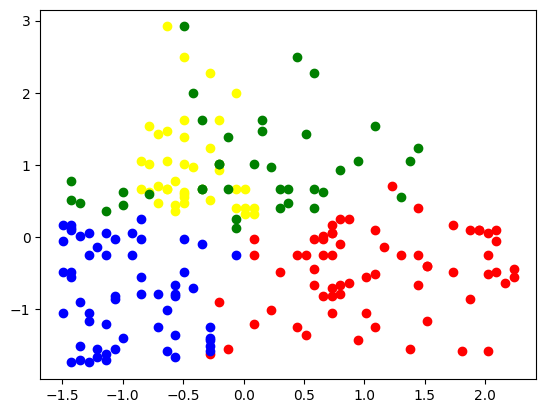

In [24]:
plt.scatter(df[y==0,0],df[y==0,1],color='red')
plt.scatter(df[y==1,0],df[y==1,1],color='yellow')
plt.scatter(df[y==2,0],df[y==2,1],color='blue')
plt.scatter(df[y==3,0],df[y==3,1],color='green')

In [29]:
dff = pd.DataFrame()

dff['col1'] = df[:,0]
dff['col2'] = df[:,1]
dff['col3'] = df[:,2]

dff['labels'] = y

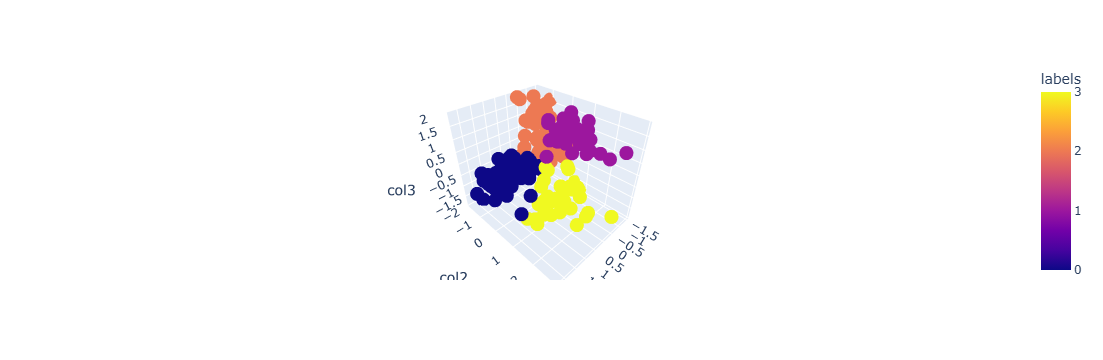

In [30]:
fig = px.scatter_3d(dff, x='col1', y='col2', z='col3', color='labels')
fig.show()